# Spaceship Titanic

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

***Help save them and change history!***
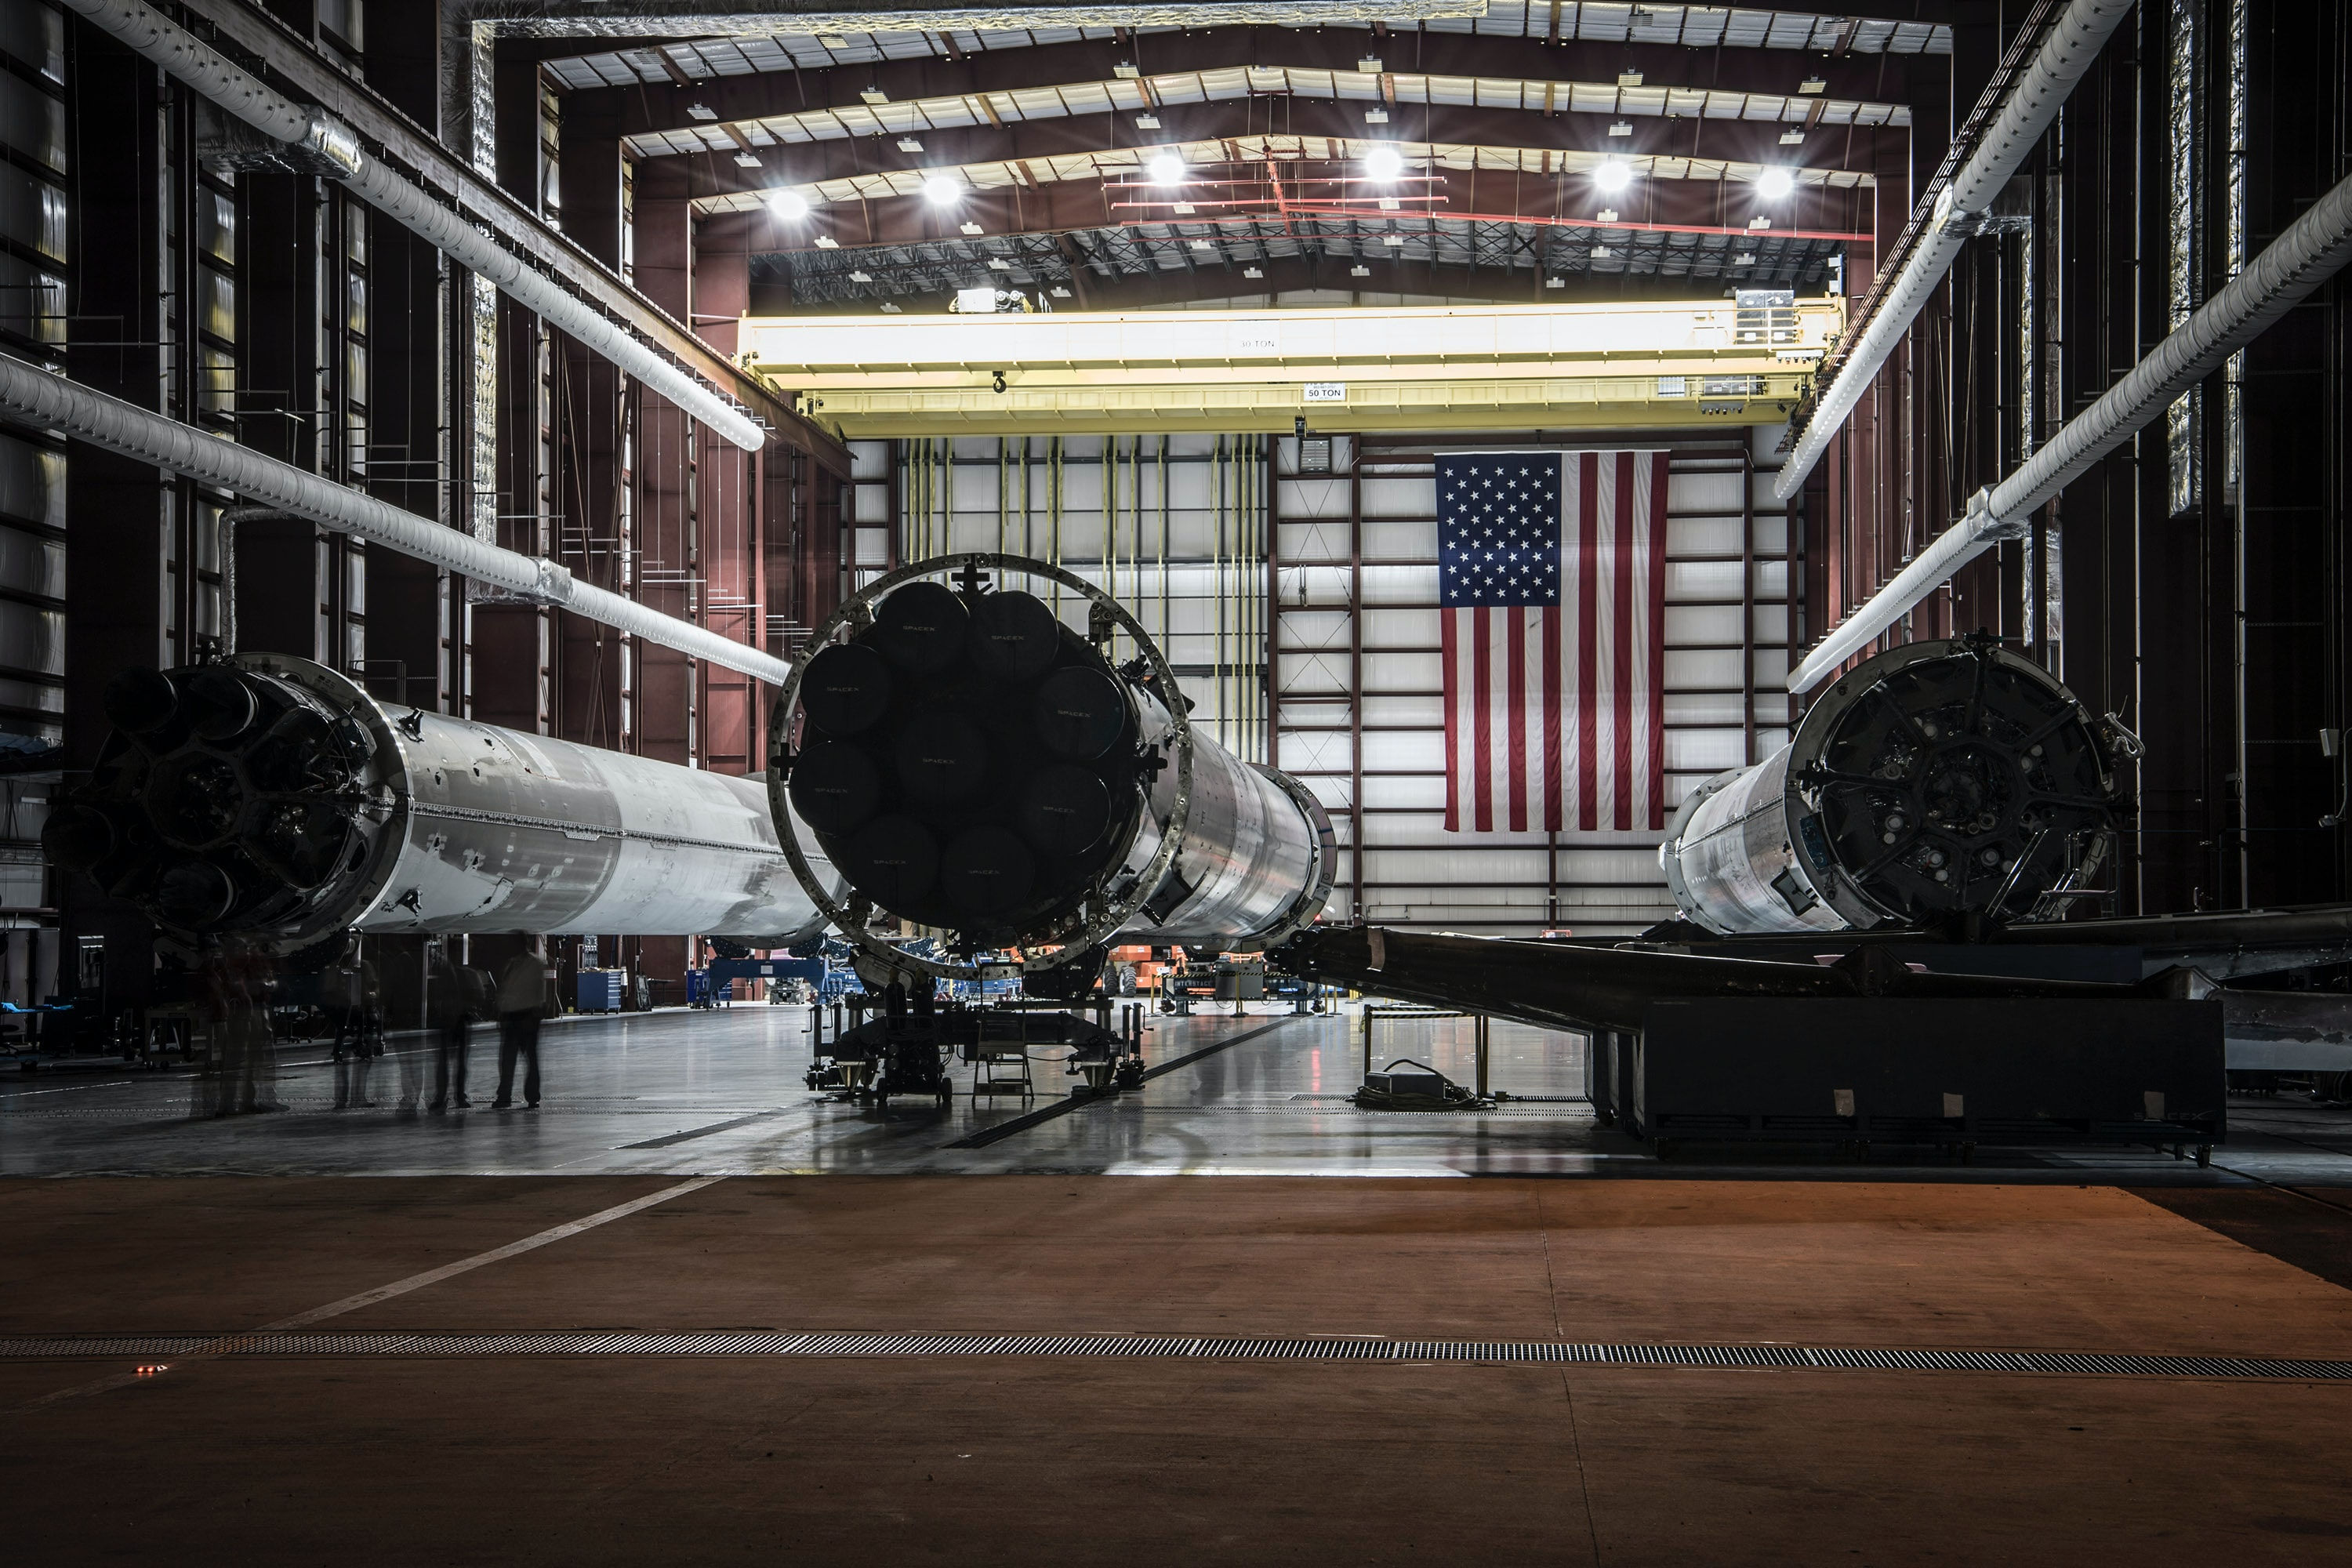
>Photo via SpaceX on unsplash

In this [Kaggle competition](https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv) the task is to ***predict whether a passenger was transported to an alternate dimension*** during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

> ## Steps
>- 00_plan
>- 01_acquire
>- 02_wrangle
>- 03_explore
>- 04_model
>- 05_conclusions

## 00_plan
### Competition Spec
This is a *Getting Started* competition which means there is no submission deadline or winning submission<br>
Evaluation Metric: Accuracy<br>
Submission Format: `submssion.csv` file
>PassengerId,Transported<br>
0013_01,False<br>
0018_01,False<br>
0019_01,False<br>
0021_01,False<br>
etc.

Competition Files:
- `train.csv` (training data)
- `test.csv` (final model test data)

This competition is sponsored by Google

## 01_acquire
[Data files on Github](https://www.kaggle.com/competitions/spaceship-titanic/data)<br>
*Initial acquire code commented out to test function on Notebook kernel restart*

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# #train
# train = pd.read_csv('train.csv')

# #test
# test = pd.read_csv('test.csv')

##### Verifying DataFrames read correctly

In [3]:
# # verify train
# train.head()

In [4]:
# # verify test
# test.head()

### Initial Hypotheses
- I think that travelers who elected cryosleep, choosing to remain in suspended animation, will have the highest rates of being transported to another dimension, making this the strongest predictive feature in determining our target. 
- I also think a customers cabin location and whether or not they traveled with VIP service will affect whether they were transported to another dimension

### Preliminary Questions
1. What is are the distributions of the target and independent variables?
2. How does each independent variable interact with the target variable?
3. Is there any correlation between independent variables?
4. Did travelers who spent more on total amenties combined have a lower chance of being lost to another dimension?
    - Possible new feature: `total_amenities`
5. How much did customers who traveled in VIP spend on total amenities and, did VIP customers tend to spend more on each amenity individually?
6. Which amenity did travelers spend the most and least on?
7. Which cabin were VIP customers most likely travel in?
    - Possible new features(s): split `cabin` into its x3 parts, `deck`, `number`, and `side`
8. Were babies and/or young children or elderly (i.e. more vulnerable age) travelers more likely to be transported to another dimension
    - Possible new feature: categorical `age_group` (e.g. 
        - infant(< 2), 
        - toddler (2-4),
        - child (5-9), 
        - pre-teen (10-13), 
        - teen (14-17),
        - adolescent(18-24),
        - young adult (25-32)
        - adult (33-45)
        - older adult (45-55)
        - elderly (> 55)

>Bonus:
>- Can travelers be grouped/clustered by last name, creating a new `family` feature?

### Acquire function

In [5]:
def acquire(train_file, test_file):
    '''
    This function takes in train and test csv file names and writes the csv files to
    pandas Dataframes.
    '''
    
    train = pd.read_csv(train_file)
    print('Train file successfully written to train DataFrame.')
    
    test = pd.read_csv(test_file)
    print('Test file successfully written to train DataFrame.')
    
    return train, test

In [6]:
train, test = acquire('train.csv', 'test.csv')

Train file successfully written to train DataFrame.
Test file successfully written to train DataFrame.


In [7]:
# train verification
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
# test verification
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
